<a href="https://colab.research.google.com/github/sestys/aicrowd_blitz4/blob/main/crdio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf data
!mkdir data 
!wget https://datasets.aicrowd.com/default/aicrowd-practice-challenges/public/crdio/v0.1/test.csv
!wget https://datasets.aicrowd.com/default/aicrowd-practice-challenges/public/crdio/v0.1/train.csv
!mv test.csv data/test.csv
!mv train.csv data/train.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

import torch

# 1. Load data


In [2]:
data_path = 'data/'
train_data = pd.read_csv(data_path + 'train.csv')
test_data = pd.read_csv(data_path + 'test.csv')

In [3]:
train_data.shape, test_data.shape

((1700, 24), (426, 23))

# 2. Data visualization

In [14]:
train_data.head(), train_data.dtypes

(     LBE     LB    AC   FM   UC  ...   Mean  Median  Variance  Tendency  NSP
 0  135.0  135.0   8.0  2.0  7.0  ...  142.0   145.0       7.0       0.0    1
 1  133.0  133.0   0.0  4.0  6.0  ...  122.0   130.0      14.0       1.0    1
 2  135.0  135.0  10.0  2.0  4.0  ...  143.0   146.0       6.0       0.0    1
 3  120.0  120.0   3.0  1.0  2.0  ...  125.0   126.0       3.0       0.0    1
 4  132.0  132.0   6.0  0.0  6.0  ...  146.0   149.0      18.0       1.0    1
 
 [5 rows x 24 columns], LBE         float64
 LB          float64
 AC          float64
 FM          float64
 UC          float64
 ASTV        float64
 MSTV        float64
 ALTV        float64
 MLTV        float64
 DL          float64
 DS          float64
 DP          float64
 DR          float64
 Width       float64
 Min         float64
 Max         float64
 Nmax        float64
 Nzeros      float64
 Mode        float64
 Mean        float64
 Median      float64
 Variance    float64
 Tendency    float64
 NSP           int64
 dt


| Index  | Attribute-Name | Details |
| ------------- | ------------- | -------------  |
1  |LBE |FHR baseline value (medical expert) (beats per minute) |
2  |LB |FHR baseline (SisPorto) (beats per minute) |
3  |AC |Number of accelerations per second  |  
4  |FM |Number of fetal movements per second  |  
5  |UC |Number of uterine contractions per second  |  
6  |ASTV |percentage of time with abnormal short term variability  |  
7  |MSTV |mean value of short term variability  |  
8  |ALTV |percentage of time with abnormal long term variability |  
9  |MLTV |mean value of long term variability |
10  |DL |Number of light decelerations per second  |  
11  |DS |Number of severe decelerations per second  |  
12  |DP |Number of prolonged decelerations per second  |  
13  |DR |Number of repetitive decelerations per second  |  
14  |Width |width of FHR histogram |
15  |Min |minimum of FHR histogram |
16  |Max |maximum of FHR histogram |
17  |Nmax |Number of histogram peaks |
18  |Nzeros |Number of histogram zeros |
19  |Mode |histogram mode  |
20  |Mean |histogram mean  |
21  |Median |histogram median |
22  |Variance |histogram variance |
23  |Tendency |histogram tendency |
24  |NSP |Normal=1; Suspect=2; Pathologic=3 |

In [11]:
print('Class accurence:\n', train_data['NSP'].value_counts())
train_data.describe()

Class accurence:
 1    1329
2     228
3     143
Name: NSP, dtype: int64


,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.0,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,133.219412,133.219412,2.684118,6.851176,3.597059,46.857647,1.334118,9.872353,8.207353,1.527647,0.002941,0.134118,0.0,70.308824,93.644118,163.952941,4.105294,0.320000,137.171176,134.485882,137.935882,18.837647,0.313529,1.302353
std,9.845934,9.845934,3.452645,34.902431,2.788713,17.164055,0.878399,18.577602,5.698527,2.430154,0.054169,0.484863,0.0,39.228544,29.728492,17.910908,2.980430,0.706449,16.542794,15.694191,14.535621,29.648333,0.609851,0.615950
min,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,50.000000,123.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.000000,4.500000,0.000000,0.000000,0.000000,0.0,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,128.000000,2.000000,0.000000,1.000000
50%,133.000000,133.000000,1.000000,0.000000,3.000000,48.000000,1.200000,0.000000,7.400000,0.000000,0.000000,0.000000,0.0,67.000000,93.500000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,10.250000,10.800000,2.250000,0.000000,0.000000,0.0,100.250000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,160.000000,19.000000,564.000000,23.000000,86.000000,7.000000,91.000000,50.700000,14.000000,1.000000,4.000000,0.0,180.000000,158.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# 3. Data preprocessing

In [4]:
_train, _val = train_test_split(train_data, test_size=0.1, random_state=42)
X_train, y_train = _train.iloc[:, :-1], _train.iloc[:, -1]
X_val, y_val = _val.iloc[:, :-1], _val.iloc[:, -1]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1530, 23), (1530,), (170, 23), (170,))

# 4. Training

In [5]:
N_features = X_train.shape[1]

In [6]:
accuracy = []
f1 = []
for i in range(1, N_features + 1):
    if i != N_features:
        pca = PCA(n_components=i)
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        X_val_pca = pca.transform(X_val)
    else:
        X_train_pca = X_train
        X_val_pca = X_val
    classifier = SVC(gamma='auto')
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_val_pca)
    accuracy.append(accuracy_score(y_val,y_pred))
    f1.append(f1_score(y_val,y_pred,average='macro'))
    print('Using {} components in PCA; accuracy: {}, F1: {}'.format(i, accuracy[-1], f1[-1]))

Using 1 components in PCA; accuracy: 0.7823529411764706, F1: 0.431011382568476
Using 2 components in PCA; accuracy: 0.8176470588235294, F1: 0.5007929190484971
Using 3 components in PCA; accuracy: 0.8058823529411765, F1: 0.43664065403195845
Using 4 components in PCA; accuracy: 0.7941176470588235, F1: 0.3730050159598723
Using 5 components in PCA; accuracy: 0.7941176470588235, F1: 0.3730050159598723
Using 6 components in PCA; accuracy: 0.788235294117647, F1: 0.3352649006622516
Using 7 components in PCA; accuracy: 0.7941176470588235, F1: 0.3364961496149615
Using 8 components in PCA; accuracy: 0.7941176470588235, F1: 0.3364961496149615
Using 9 components in PCA; accuracy: 0.7941176470588235, F1: 0.3364961496149615
Using 10 components in PCA; accuracy: 0.7941176470588235, F1: 0.3364961496149615
Using 11 components in PCA; accuracy: 0.7941176470588235, F1: 0.3364961496149615
Using 12 components in PCA; accuracy: 0.7941176470588235, F1: 0.3364961496149615
Using 13 components in PCA; accuracy: 

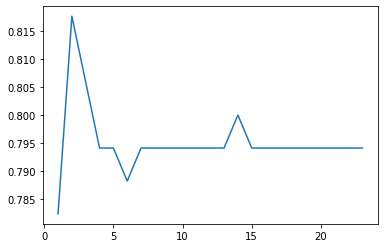

In [7]:
x_range = list(range(1, N_features + 1))
plt.plot(x_range, accuracy)

In [8]:
best = np.argmax(np.array(f1)) + 1
best

2

# 5. Test

In [13]:
pca = PCA(n_components=best)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test = pca.transform(test_data)

In [14]:
classifier = SVC(gamma='auto')
classifier.fit(X_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
prediction = classifier.predict(X_test)

In [16]:
submission = pd.DataFrame(prediction)
submission.to_csv('data/crdio_submission_svm.csv', header=['NSP'], index=False)

In [17]:
try:
  from google.colab import files
  files.download('data/crdio_submission_svm.csv')
except ImportError as e:
  print("Only for Collab") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>